# Sformułowanie problemu

Umiemy uczyć gradientowo minimalizując. Problem z klasycznym perceptronem polega na tym, że funkcja Heaviside'a jest nieróżniczkowalna, oraz jej pochodna jest zero. W związku z tym nie da się jej użyć do uczenia.

Pomysł na rozwiązanie -- zamiast zwracania wartości hard $\{0,1\}$ uciąglamy model, i chcemy zwracać soft z zakresu $(0,1)$. Będziemy interpretować jako prawdopodobieństwo, że punkt jest klasy $1$.

Można takich funkcji zbudować wiele, ale najlepiej sprawdziła się sigmoida zadana wzorem
$$
\sigma(x)=\frac{1}{1+\exp(-x)}=\frac{\exp(x)}{1+\exp(x)}.
$$
Ona wygląda tak jakbyśmy wygładzili funkcję Heaviside'a.

*Własności*:
- $1-\sigma(x)=\sigma(-x)$
- $\sigma'(x)=\sigma(x) \cdot (1-\sigma(x))$
- $[\log \sigma(x)]'=1-\sigma(x)$


W konsekwencji nasz model (probabilistyczny, bo zwraca prawdopodobieństwo bycia w klasie) będzie dany wzorem
$$
p(x)=\sigma(v^T x+b)
$$
gdzie $p$ oznacza prawdopodobieństwo, że $x$ ma klasę $1$.

Finalnie chcemy dobrać $v$ i $b$ by $p(x_k) \approx y_k$.

# Loss (funkcja straty/kosztu)
W sieciach się przyjęło, że minimalizujemy loss. Chcielibyśmy go tak dobrać, by model się nauczył. Najprostsze podejście które można zaproponować to błąd predykcji, czyli loss na zbiorze $X$ by wynosił
$$
loss=\sum_i |y_i-p(x_i)|.
$$
Taki loss jest poprawny, ale nie da najlepszych wyników. Spowodowane to jest tym, że gradient w sytuacji błędnej predykcji nie jest za duży.

Ogólnie najlepiej sprawdziło się podejście probabilistyczne do losu, gdzie traktujemy wyjście z sieci jako model probabilistyczny, który zwraca nam rozkład prawdopodobieństwa na możliwych wynikach, i staramy się modyfikować parametry sieci by maksymalizować log-likelihood prawidłowego wyniku.

Czyli nasz model zwraca nam rozkład prawdopodobieństwa $P$, na zbiorze $\{0,1\}$, gdzie jeżeli $x_k$ ma klasę $y_k \in \{0,1\}$, to prawdopodobieństwo (likelihood) wylosowania $y_k$ w naszym modelu wynosi
$$P=
\begin{cases}
1-p(x_k) \text{ gdy } y_k=0, \\
p(x_k) \text{ gdy } y_k=1.
\end{cases}
$$
Czyli log-likelihood wynosi
$$
\log P=
\begin{cases}
\log(1-p(x_k)) \text{ gdy } y_k=0, \\
\log p(x_k) \text{ gdy } y_k=1.
\end{cases}
$$
Ponieważ sieci pracują na operacjach macierzowych, łatwiej/szybciej im zrozumieć sumy niż instrukcje warunkowe, więc finalnie możemy zapisać
$$
\log P=y_k \log p(x_k)+(1-y_k) \log (1-p(x_k)).
$$
Finalnie, ponieważ chcemy maksymalizować log-likelihood, a loss minimalizujemy, kładziemy
$$
loss(x_k,y_k)=-y_k \log p(x_k)-(1-y_k) \log (1-p(x_k)).
$$
Całkowity loss dla próbki wielkości $n$ jest dany wzorem
$$
loss=\frac{1}{n}\sum_i loss(x_k,y_k),
$$
gdzie uśrednia się ten loss po wszystkich elementach.

Ten loss nazywa się BCE loss (od Binary Cross-Entropy).

# Optymalizacja gradientowa
Ogólnie sieci potrafią same wyliczyć gradient, ale te model sieci
$$
x \to \sigma(v^Tx+b)
$$
jest na tyle prosty, że możemy go wyliczyć sami [proszę to wykonać jako ćwiczenie].
Powinno wyjść
$$
\nabla_v loss=-\frac{1}{n} \sum_i error_i \cdot x_i, \nabla_b=-\frac{1}{n}\sum_i error_i,
$$
gdzie $error_i$ to błąd predykcji, czyli $error_i=y_i-p_i$, gdzie $p_k=\sigma(v^T x_k+b)$.

Zauważmy, że te update wygląda analogicznie do tego jak był dla klasycznego perceptronu.

# Stochastic Gradient Descent (SGD)
Model GD (Gradient Descent) w optymalizacji używa całego zbioru danych w każdej iteracji (dokładny, ale powolny).

Mini-Batch Gradient Descent (SGD): Dzieli dane na mniejsze części (mini-batche), obliczając gradient na podstawie jednej z tych części (szybsze, ale z pewnym szumem w gradientach, co często jest plusem gdyż pozwala na uciekanie z minimów lokalnych).

# ADAM optimizer
W praktyce w sieciach najczęściej używać będą Państwo optymalizatora ADAM, który się dobrze sprawdza i osiąga lepsze wyniki niż klasyczny model SGD.

| **Cecha**                                   | **Gradient Descent (GD)**                            | **Adam**                                    |
|---------------------------------------------|-----------------------------------------------------|---------------------------------------------|
| **Szybkość zbieżności**                     | Zwykle wolniejsza, szczególnie w przypadku trudnych funkcji | Szybsza, lepsza na trudnych funkcjach      |
| **Dostosowanie tempa uczenia**              | Stałe tempo uczenia \( \alpha \)                    | Adaptacyjne tempo uczenia dla każdej wagi  |
| **Wrażliwość na dobór \( \alpha \)**         | Wysoka; zbyt małe \( \alpha \) sprawia, że algorytm jest wolny, zbyt duże \( \alpha \) może powodować niestabilność | Mniejsza, lepiej dostosowuje się do funkcji |
| **Prędkość konwergencji**                   | Może wymagać wielu iteracji, zwłaszcza przy źle skalowanych funkcjach | Szybsza konwergencja, szczególnie w trudnych przypadkach |
| **Stabilność**                              | Może być niestabilny, szczególnie przy dużym współczynniku uczenia | Bardzo stabilny dzięki adaptacyjnym chwilowym estymacjom |
| **Złożoność obliczeniowa**                  | Niska (prosta implementacja)                        | Wyższa (wymaga dodatkowych estymatorów momentów) |



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def predict(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.rand()

        for _ in range(self.epochs):
            # Obliczanie prognozy i błędu
            linear_output = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_output)

            # Obliczanie gradientów
            error = y - predictions
            weight_update = self.learning_rate * np.dot(X.T, error) / n_samples
            bias_update = self.learning_rate * np.sum(error) / n_samples

            # Aktualizacja wag i biasu
            self.weights += weight_update
            self.bias += bias_update

    def accuracy(self, X, y):
        y_pred = self.predict(X) >= 0.5  # Threshold = 0.5 for binary classification
        return np.mean(y_pred == y)


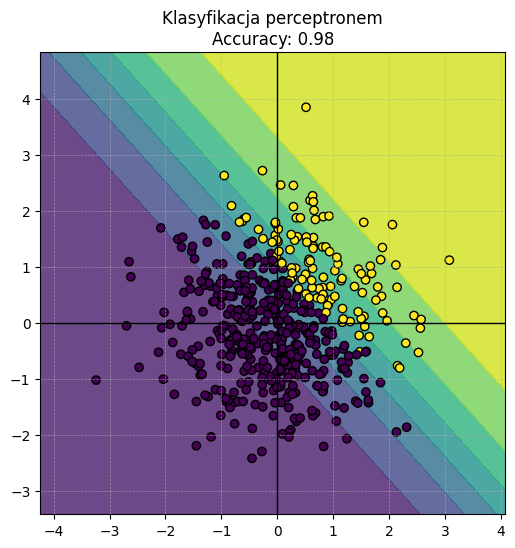

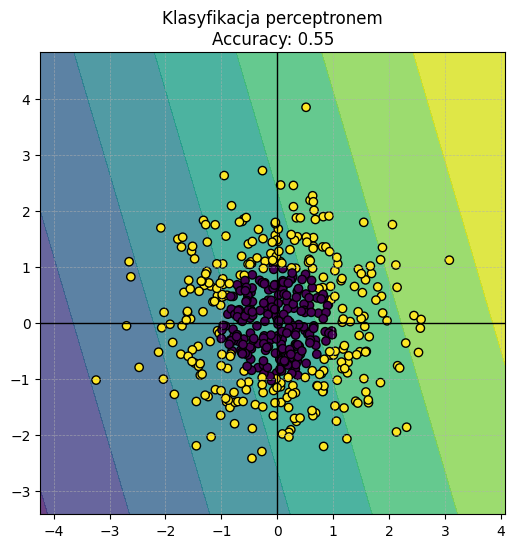

In [ ]:
def wizualizacja(X,y):
  # Trenowanie perceptronu
  perceptron = Perceptron(learning_rate=0.1, epochs=100)
  perceptron.fit(X, y)
  acc = perceptron.accuracy(X, y)

  # Wizualizacja wyników z kolejnymi barierami decyzyjnymi
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  plt.figure(figsize=(6, 6))

  # Ostateczna bariera decyzyjna
  Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8)

  # Punkty danych
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
  plt.axhline(0, color='black', linewidth=1, linestyle='-')
  plt.axvline(0, color='black', linewidth=1, linestyle='-')
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.title(f'Klasyfikacja perceptronem\nAccuracy: {acc:.2f}')
  plt.show()

# Generowanie prostych danych
e=0.1
np.random.seed(42)
X = np.random.randn(500, 2)
y = np.array([1 if x[0] + x[1]>1+np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)


e=0.1
np.random.seed(42)
X = np.random.randn(500, 2)
y = np.array([1 if x[0]**2 + x[1]**2>1+np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)


